In [2]:
%pylab inline
import operator

from numpy import *
pylab.rcParams['figure.figsize'] = (15, 10)
import requests
from scipy import interpolate
import numpy as np
from scipy import sparse

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy
def smooth(x,window_len=23,window='hanning'):
    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]

    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y[11:-11]


In [4]:
names=['20180615_TM60P0.hys','20180615a.hys','20180615b.hys','20180615c.hys2','20180615d.hys','20180615e.hys','20180615f.hys2']
pressures=['0','a 2.38 GPa','b 2.62 GPa','c 1.43 GPa','d 5.56 GPa','e 3.79 GPa','f 0.71 GPa']
rlow=['187','187','187','287','187','187','187']
rup=['289','289','289','489','289','289','289']
lines=['k-','k--','b:','r-','g-.','r:','b-']

HysLink=["https://www.geophysik.uni-muenchen.de/~gilder/P4.3_2018/4.3_2018_Report/"
         ,"https://raw.githubusercontent.com/Nicolucas/Geomag/master/Data/DiaParaMag_adj85/"
         ,"https://raw.githubusercontent.com/Nicolucas/Geomag/master/Data/DiaParaMag_adj70/"
         ,"https://raw.githubusercontent.com/Nicolucas/Geomag/master/Data/DiaParaMag_Nadj70/"
        ]
titl=["NoAdj","adj-85","adj-70","adj-70(Norm)"]

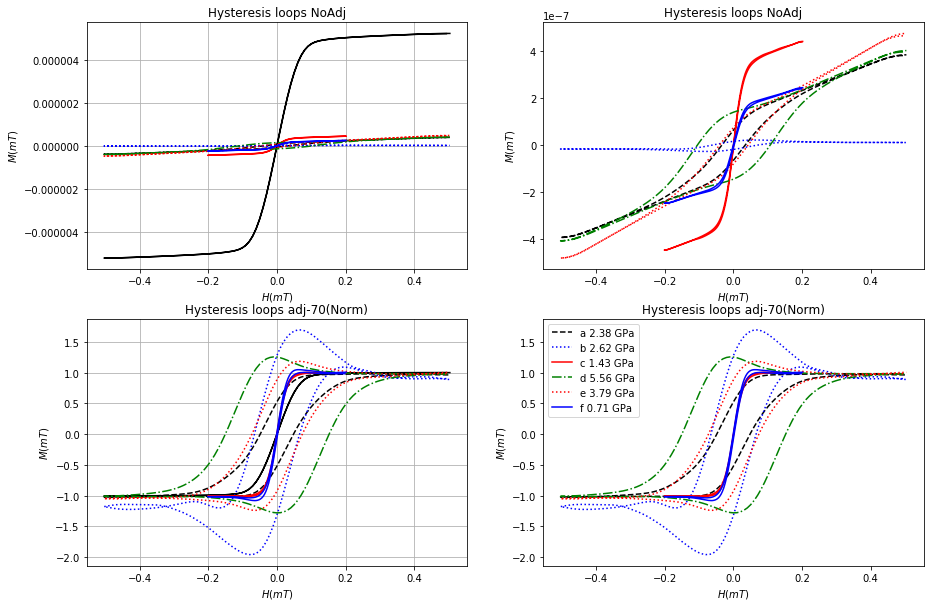

In [5]:
for l in [0,3]:
    for k in range(2):
        num=219+2*(l+1)+k
        
        if (l==3):
            num=219+2*(l+1-2)+k
            
            
        subplot(num)
        for j in range(k,len(names)):
            link = requests.get(HysLink[l]+names[j])
            data = link.text
            
            #GET NORMALIZATION FACTOR
            normalize=data.strip().split('\n')[43:44]
            normalize=normalize[0].replace("Normalization factor           ","").replace("\r","")
            if "N/A" not in normalize:
                normalize=float(normalize)
            else:
                normalize=1.
                
            #GET SLOPE CORRECTION FACTOR
            slope=data.strip().split('\n')[47:48]
            slope=slope[0].replace("Slope correction","").replace("\r","")
            if "No" not in slope:
                slope=float(slope)
            else:
                slope=0.
            
            #EXTRACT DATA AND APPLY CORRECTIONS
            t0=[]
            x0=[]
            x1=[]
            
            temp1=int(rlow[j])
            for i in data.strip().split('\n')[87:temp1]:
                t0.append(float(i.strip('\r').split(',')[0]))
                x0.append((float(i.strip('\r').split(',')[1])+(slope*float(i.strip('\r').split(',')[0])))*normalize)
                x1.append(float(i.strip('\r').split(',')[2]))
            temp2=int(rup[j])
            for i in data.strip().split('\n')[temp1+2:temp2]:
                t0.append(float(i.strip('\r').split(',')[0]))
                x0.append((float(i.strip('\r').split(',')[1])+(slope*float(i.strip('\r').split(',')[0])))*normalize)
                x1.append(float(i.strip('\r').split(',')[2]))
                
                
                
            #PLOT THE DATA
            title("Hysteresis loops "+titl[l])
            plot(t0,smooth(x0),lines[j],label=pressures[j])
            xscale('linear')
            yscale('linear')
            ylabel("$M (mT)$")
            xlabel("$H (mT)$")
            grid()
legend()
show()

In [6]:
pylab.rcParams['figure.figsize'] = (15, 5)

def plotTM(Datlink,fname,poslow,posup,HeatCool,j):
    link = requests.get(Datlink[0]+fname[j])
    data = link.text

    T=[]
    M=[]
    TField=[]
    adjT=[]
    
    temp1=int(poslow[j])
    temp2=int(posup[j])
    
    if HeatCool == 0:
        for i in data.strip().split('\n')[69:temp1]:
            T.append(float(i.strip('\r').split(',')[0]))

            if j==5:
                M.append(-float(i.strip('\r').split(',')[1]))
            else:
                M.append(float(i.strip('\r').split(',')[1]))

            TField.append(float(i.strip('\r').split(',')[2]))
            adjT.append(float(i.strip('\r').split(',')[3]))
        init=0
        indPos=M.index(M[-1])
    else:
        for i in data.strip().split('\n')[temp1+2:temp2]:

            T.append(float(i.strip('\r').split(',')[0]))
            if j==5:
                M.append(-float(i.strip('\r').split(',')[1]))
            else:
                M.append(float(i.strip('\r').split(',')[1]))
            TField.append(float(i.strip('\r').split(',')[2]))
            adjT.append(float(i.strip('\r').split(',')[3]))
        init=M.index(M[-1])
        indPos=M.index(M[0])
    
    offset=np.empty(size(M)); offset.fill((M[indPos])/(M[init]-M[indPos]))
    scale=np.empty(size(M)); scale.fill(M[init]-M[indPos])
    MCorr=(M/scale)-offset
    
    return (T, smooth(MCorr),TField,adjT)

In [7]:
TM0names=[ '20180615_TM60P0_100-200K_0mT','20180615_TM60P0_100-200K_1mT'
          ,'20180615_TM60P0_100-200K_5mT','20180615_TM60P0_100-200K_50mT','20180615_TM60P0_100-200K_500mT']

TM1names=['20180615a_100-200_1mT','20180615b_100_200_1mT','20180615c_100-200_1mT'
         ,'20180615d_100-200_1mT','20180615e_100-200_1mT','20180615f_100-200_1mT']

TM5names=['20180615a_25-200_5mT','20180615b_25_200_5mT','20180615c_25-200_5mT'
         ,'20180615d_25-200_5mT','20180615e_25-200_5mT','20180615f_25-200_5mT']

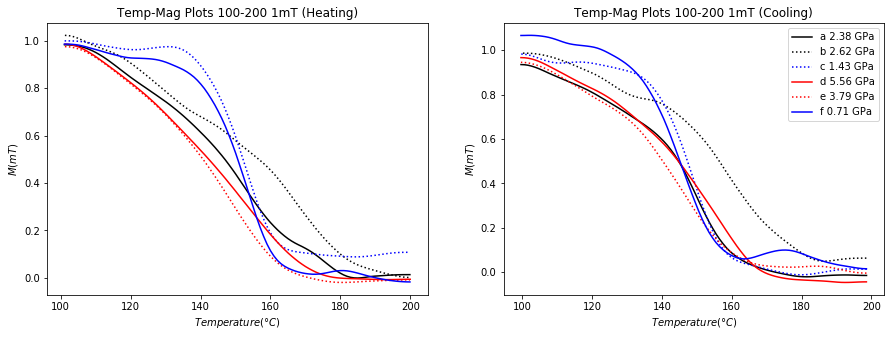

In [8]:
TMpressures=['a 2.38 GPa','b 2.62 GPa','c 1.43 GPa','d 5.56 GPa','e 3.79 GPa','f 0.71 GPa']
TMrlow=['169','169','169','169','169','169']
TMrup=['271','271','271','271','271','271']
TMlines=['k-','k:','b:','r-','r:','b-']

HysLink=["https://www.geophysik.uni-muenchen.de/~gilder/P4.3_2018/4.3_2018_Report/"]

#2008 paper on single crystal domain TiM
#how hidrostatic conditions influences the results? dunno how bitch, but fo' sure
#depending on the direction of presurization, 
#the verway transition might increase or decrease. however in general it increases

subplot(121)
for j in range(len(TM1names)):
    T, M,TField,adjT=plotTM(HysLink,TM1names,TMrlow,TMrup,0,j)
    title("Temp-Mag Plots 100-200 1mT (Heating)")
    plot(adjT,M,TMlines[j],label=TMpressures[j])
    xscale('linear')
    yscale('linear')
    ylabel("$M (mT)$")
    xlabel("$ Temperature (\degree C)$")
    grid()
subplot(122)
for j in range(len(TM1names)):
    T, M,TField,adjT=plotTM(HysLink,TM1names,TMrlow,TMrup,1,j)
    title("Temp-Mag Plots 100-200 1mT (Cooling)")
    plot(adjT,M,TMlines[j],label=TMpressures[j])
    xscale('linear')
    yscale('linear')
    ylabel("$M (mT)$")
    xlabel("$ Temperature (\degree C)$")
    grid()
legend()
show()

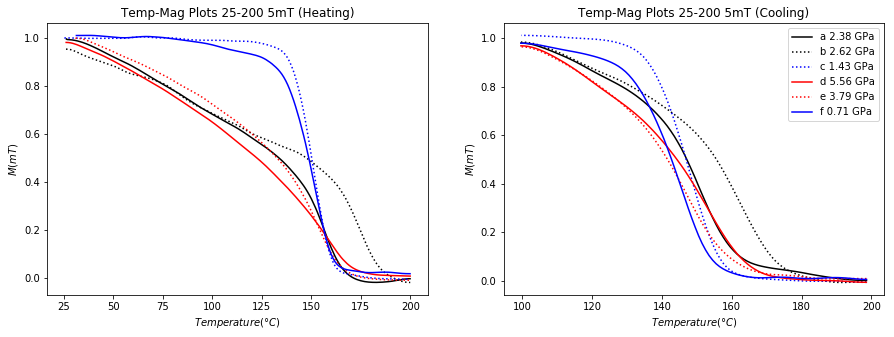

In [9]:
TMpressures=['a 2.38 GPa','b 2.62 GPa','c 1.43 GPa','d 5.56 GPa','e 3.79 GPa','f 0.71 GPa']
TMrlow=['244','244','244','244','239','239']
TMrup=['346','346','346','346','341','341']
TMlines=['k-','k:','b:','r-','r:','b-']

HysLink=["https://www.geophysik.uni-muenchen.de/~gilder/P4.3_2018/4.3_2018_Report/"]

subplot(121)
for j in range(len(TM5names)):
    T, M,TField,adjT=plotTM(HysLink,TM5names,TMrlow,TMrup,0,j)
    title("Temp-Mag Plots 25-200 5mT (Heating)")
    plot(adjT,M,TMlines[j],label=TMpressures[j])
    xscale('linear')
    yscale('linear')
    ylabel("$M (mT)$")
    xlabel("$ Temperature (\degree C)$")
    grid()
subplot(122)
for j in range(len(TM5names)):
    T, M,TField,adjT=plotTM(HysLink,TM5names,TMrlow,TMrup,1,j)
    title("Temp-Mag Plots 25-200 5mT (Cooling)")
    plot(adjT,M,TMlines[j],label=TMpressures[j])
    xscale('linear')
    yscale('linear')
    
    ylabel("$M (mT)$")
    xlabel("$ Temperature (\degree C)$")
    
    grid()
legend()
show()

## Derivative -Retrieving the Curie Temperature-
First we get the laplacian matrix in 1D (size variable) from each set of data in the T vs Mmoment plots, then, we multiply the matrix by the array of corrected magnetic moment (MCorr) following the finite differences method:

$\frac{f(x_{j+1})-2f(x_{j})+f(x_{j-1})}{h^2}=f''(x_j)\rightarrow
\frac{1}{h^2}
 \begin{pmatrix} 
    -2 & 1 & 0 & \dots \\
     1 & -2 & 1 & \dots \\
    \vdots &\ddots &\ddots & 1\\
    0 &  \dots  &   1 & -2 
  \end{pmatrix}  
    \begin{pmatrix}
    MCorr_1      \\
    ...      \\
    ...      \\
    ...      \\
    MCorr_N       
\end{pmatrix}
=
\begin{pmatrix}
    MCorr''_1      \\
    ...      \\
    ...      \\
    ...      \\
    MCorr''_N       
\end{pmatrix}
$
$\frac{f(x_{j+1})-f(x_{j-1})}{h}=f'(x_j)\rightarrow
\frac{1}{h}
 \begin{pmatrix} 
     0 & 1 & 0 & \dots \\
     -1 & 0 & 1 & \dots \\
    \vdots &\ddots &\ddots & 1\\
    0 &  \dots  &   -1 & 0 
  \end{pmatrix}  
    \begin{pmatrix}
    MCorr_1      \\
    ...      \\
    ...      \\
    ...      \\
    MCorr_N       
\end{pmatrix}
=
\begin{pmatrix}
    MCorr'_1      \\
    ...      \\
    ...      \\
    ...      \\
    MCorr'_N       
\end{pmatrix}
$

In [10]:
def retDeriv(MCHammer,dT):
    N  = size(MCHammer)
    main_diag = np.ones(N)*0.0
    side_diag = np.ones(N-1)*1.0
    side_diag2 = np.ones(N-1)*-1.0
    diagonals = [main_diag,side_diag2,side_diag]
    laplacian = sparse.diags(diagonals, [0, -1, 1], format="csr")
    a = np.array(laplacian.toarray())
    b = np.array(MCHammer)
    deriv=a.dot(b)
    
    scale=np.empty(size(MCHammer)); scale.fill(dT)
    result=(deriv/scale)
    
    #return result
    return result
retDeriv([1,2,3],1)

array([ 2.,  2., -2.])

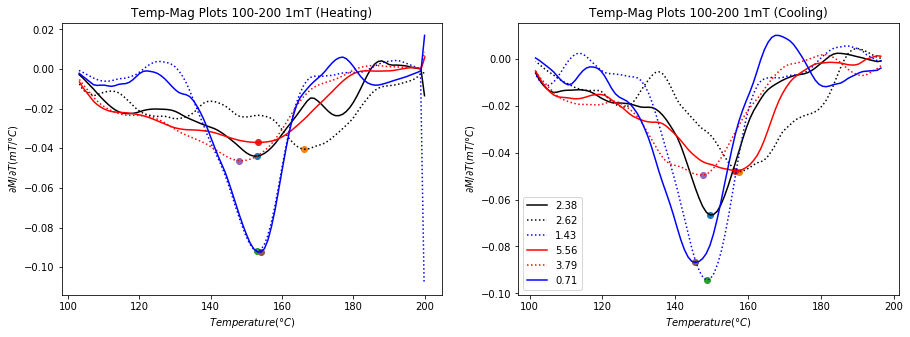

In [11]:
TMpressures=['a 2.38 GPa','b 2.62 GPa','c 1.43 GPa','d 5.56 GPa','e 3.79 GPa','f 0.71 GPa']
TMrlow=['169','169','169','169','169','169']
TMrup=['271','271','271','271','271','271']
TMlines=['k-','k:','b:','r-','r:','b-']
HysLink=["https://www.geophysik.uni-muenchen.de/~gilder/P4.3_2018/4.3_2018_Report/"]



HotTc=[]
CoolTc=[]
TMpressures=[2.38,2.62,1.43,5.56,3.79,0.71]

subplot(121)
for j in range(len(TM1names)):
    T, M,TField,adjT=plotTM(HysLink,TM1names,TMrlow,TMrup,0,j)
    dT=T[1]-T[0]
    D=retDeriv(M,1)
    
    indi=[0,1,len(TM1names)-1,len(TM1names)-2]
    adjT=np.delete(adjT, indi)
    D=np.delete(D, indi)
    
    min_index, min_value = min(enumerate(D[:-10]), key=operator.itemgetter(1))
    HotTc.append(adjT[min_index])
    
    scatter(adjT[min_index],min_value)
    
    title("Temp-Mag Plots 100-200 1mT (Heating)")
    plot(adjT,D,TMlines[j],label=TMpressures[j])
    xscale('linear')
    yscale('linear')
    ylabel("$\partial M / \partial T (mT/\degree C)$")
    xlabel("$ Temperature (\degree C)$")
    grid()
subplot(122)
for j in range(len(TM1names)):
    T, M,TField,adjT=plotTM(HysLink,TM1names,TMrlow,TMrup,1,j)
    dT=T[1]-T[0]
    D=retDeriv(M,-1)
    
    indi=[0,1,len(TM1names)-1,len(TM1names)-2]
    adjT=np.delete(adjT, indi)
    D=np.delete(D, indi)
    
    min_index, min_value = min(enumerate(D[:-10]), key=operator.itemgetter(1))
    CoolTc.append(adjT[min_index])
    scatter(adjT[min_index],min_value)
    
    title("Temp-Mag Plots 100-200 1mT (Cooling)")
    plot(adjT[:-2],D[:-2],TMlines[j],label=TMpressures[j])
    xscale('linear')
    yscale('linear')

    ylabel("$\partial M / \partial T (mT/\degree C)$")
    xlabel("$ Temperature (\degree C)$")
    grid()
legend()
show()

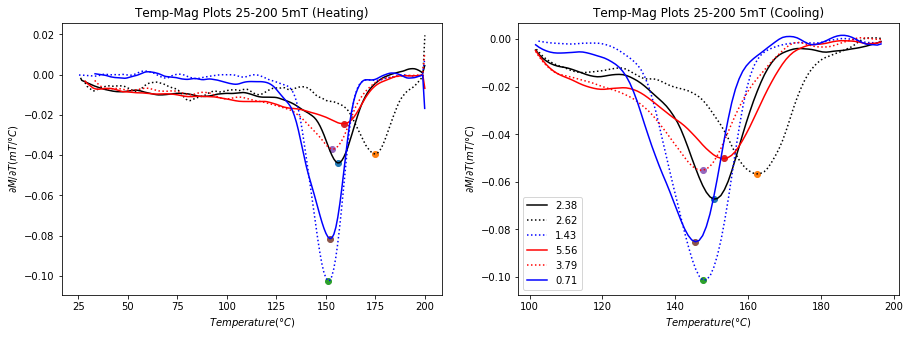

In [12]:
TMpressures=['a 2.38 GPa','b 2.62 GPa','c 1.43 GPa','d 5.56 GPa','e 3.79 GPa','f 0.71 GPa']
TMrlow=['244','244','244','244','239','239']
TMrup=['346','346','346','346','341','341']
TMlines=['k-','k:','b:','r-','r:','b-']

HysLink=["https://www.geophysik.uni-muenchen.de/~gilder/P4.3_2018/4.3_2018_Report/"]


HotTc2=[]
CoolTc2=[]
TMpressures=[2.38,2.62,1.43,5.56,3.79,0.71]


subplot(121)
for j in range(len(TM5names)):
    T, M,TField,adjT=plotTM(HysLink,TM5names,TMrlow,TMrup,0,j)
    
    dT=T[1]-T[0]
    D=retDeriv(M,1)
        
    indi=[0,1,len(TM5names)-1,len(TM5names)-2]
    adjT=np.delete(adjT, indi)
    D=np.delete(D, indi)
    
    
    min_index, min_value = min(enumerate(D[0:-10]), key=operator.itemgetter(1))
    HotTc2.append(adjT[min_index])
    scatter(adjT[min_index],min_value)
    
    title("Temp-Mag Plots 25-200 5mT (Heating)")
    plot(adjT,D,TMlines[j],label=TMpressures[j])
    xscale('linear')
    yscale('linear')
    
    ylabel("$\partial M / \partial T (mT/\degree C)$")
    xlabel("$ Temperature (\degree C)$")

    grid()
subplot(122)
for j in range(len(TM5names)):
    T, M,TField,adjT=plotTM(HysLink,TM5names,TMrlow,TMrup,1,j)
    dT=T[1]-T[0]
    D=retDeriv(M,-1)
    
    
    indi=[0,1,len(TM5names)-1,len(TM5names)-2]
    adjT=np.delete(adjT, indi)
    D=np.delete(D, indi)
    
    min_index, min_value = min(enumerate(D[:-10]), key=operator.itemgetter(1))
    CoolTc2.append(adjT[min_index])
    scatter(adjT[min_index],min_value)
    
    title("Temp-Mag Plots 25-200 5mT (Cooling)")
    plot(adjT[:-2],D[:-2],TMlines[j],label=TMpressures[j])
    xscale('linear')
    yscale('linear')
    
    ylabel("$\partial M / \partial T (mT/\degree C)$")
    xlabel("$ Temperature (\degree C)$")
    grid()
legend()
show()

[2.38, 2.62, 1.43, 5.56, 3.79, 0.71]
[153.0495, 166.0855, 152.9199, 153.1264, 148.0659, 154.0492]
[156.0343, 175.0424, 150.9036, 159.0655, 153.0497, 152.0205]
[149.538, 157.4671, 148.6349, 156.4579, 147.5168, 145.5189]
[150.5051, 162.4432, 147.6333, 153.4641, 147.5168, 145.5283]


<ErrorbarContainer object of 3 artists>

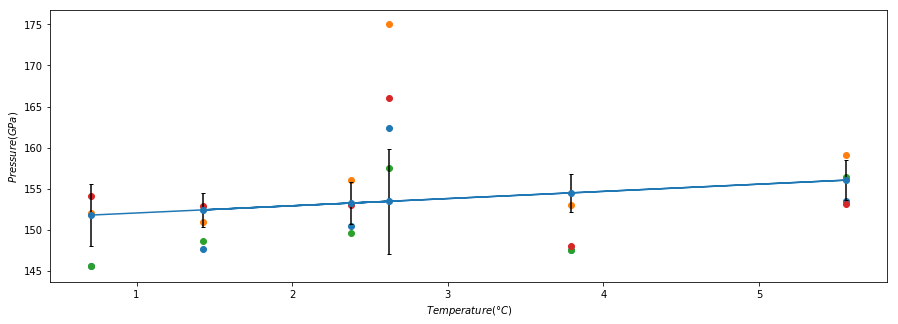

In [13]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'errorbar.capsize': 2})

scatter(TMpressures,CoolTc2)
scatter(TMpressures,HotTc2)
scatter(TMpressures,CoolTc)
scatter(TMpressures,HotTc)

pres=np.concatenate((TMpressures,TMpressures,TMpressures,TMpressures))
TcArray=np.concatenate((HotTc,HotTc2,CoolTc,CoolTc2))
coef=np.polyfit(pres,TcArray,1)


TMpressure=np.array(TMpressures)
print(TMpressures)
print(HotTc)
print(HotTc2)
print(CoolTc)
print(CoolTc2)
err=[]
for i in range(6):
    err.append(float(np.std(np.array([HotTc[i],HotTc2[i],CoolTc[i],CoolTc2[i]]))))

ylabel("$Pressure(GPa)$")
xlabel("$Temperature (\degree C)$")


plt.errorbar(TMpressure,TMpressure*coef[0]+coef[1],yerr=np.array(err),fmt='-o',ecolor='k') 


# Dia Plots

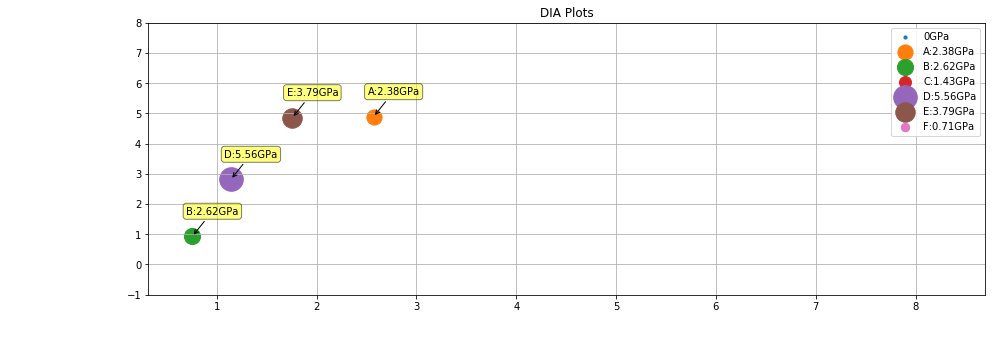

In [14]:
names=['20180615_TM60P0.hys','20180615a.hys','20180615b.hys','20180615c.hys2','20180615d.hys','20180615e.hys','20180615f.hys2']
Backfield=['20180615_TM60P0.bak','20180615a.bak','20180615b.bak','20180615c.bak2','20180615d.bak','20180615e.bak','20180615f.bak']
HysLink=["https://raw.githubusercontent.com/Nicolucas/Geomag/master/Data/DiaParaMag_SmoothAdj70/"]
HysLink2=["https://www.geophysik.uni-muenchen.de/~gilder/P4.3_2018/4.3_2018_Report/"]
pressures=['0GPa','A:2.38GPa','B:2.62GPa','C:1.43GPa','D:5.56GPa','E:3.79GPa','F:0.71GPa']
area=[10,230,260,143,556,379,71]
         
      
BCr=[]

t0=[]
x0=[]
    
for j in range(len(names)):
    link = requests.get(HysLink2[0]+names[j])
    data = link.text
    
        
    Mrs=data.strip().split('\n')[59:60]
    #print(names[j])
    #print(Mrs)
    Mrs=Mrs[0].replace("Saturation                     ","").replace("\r","")

    Ms=data.strip().split('\n')[60:61]
    #print(Ms)
    Ms=Ms[0].replace("Remanence                      ","").replace("\r","")
    
    Bc=data.strip().split('\n')[61:62]
    #print(Bc)
    Bc=Bc[0].replace("Coercivity                     ","").replace("\r","")
    
    link = requests.get(HysLink2[0]+Backfield[j])
    data = link.text

         
    Bcr=data.strip().split('\n')[60:61]
    #print(Bcr)
    Bcr=Bcr[0].replace("Coercivity (remanent)          ","").replace("\r","")    
    if "N/A" in Bcr:
        Bcr=100E-6
    BCr.append(Bcr)
    
    #EXTRACT DATA AND APPLY CORRECTIONS
    
     
    x0.append(abs(float(Mrs))/abs(float(Ms)))     
    t0.append(abs(float(Bcr))/abs(float(Bc)))



    #PLOT THE DATA
for j in range(len(names)):
    title("DIA Plots")
    scatter(t0[j],x0[j],s=area[j],label=pressures[j])
    
    xscale('linear')
    yscale('linear')
    ylim(-1,8)
    #xlim(0.2,1.75)
    
    grid()
    annotate(pressures[j],
        xy=(t0[j], x0[j]), xytext=(20, 20),
        textcoords='offset points', ha='center', va='bottom',
        bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
legend()
show()

In [15]:
print(BCr)
print(pressures)

['+2.287837E-03', '+71.35988E-03', '+70.34044E-03', 0.0001, '+124.8852E-03', '+69.70351E-03', '+433.2584E-06']
['0GPa', 'A:2.38GPa', 'B:2.62GPa', 'C:1.43GPa', 'D:5.56GPa', 'E:3.79GPa', 'F:0.71GPa']
